# Urban Cycling Dynamics: A Comprehensive Analysis of Bike Counts in Germany — Part 1

## First City: Munich

In [439]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter, MultipleLocator
import numpy as np
import seaborn as sns
import pingouin as pg
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
RANDOM_SEED = np.random.seed(0)
rcParams['figure.figsize'] = 10, 6

muc_2015 = "./munich2015.csv"
muc_2016 = "./munich2016.csv"
muc_2017 = "./munich2017.csv"
muc_2018 = "./munich2018.csv"
muc_2019 = "./munich2019.csv"
muc_2020 = "./munich2020.csv"
muc_2021 = "./munich2021.csv"
muc_2022 = "./munich2022.csv"

df_muc_2015 = pd.read_csv(muc_2015)
df_muc_2016 = pd.read_csv(muc_2016)
df_muc_2017 = pd.read_csv(muc_2017)
df_muc_2018 = pd.read_csv(muc_2018)
df_muc_2019 = pd.read_csv(muc_2019)
df_muc_2020 = pd.read_csv(muc_2020)
df_muc_2021 = pd.read_csv(muc_2021)
df_muc_2022 = pd.read_csv(muc_2022)

df_munich = pd.concat([df_muc_2015,df_muc_2016,df_muc_2017,df_muc_2018,df_muc_2019,df_muc_2020,df_muc_2021,df_muc_2022], ignore_index=True)

# Since all the values of the column Uhrzeit start and end are always the same, they are not really needed for the analysis, we then will drop these columns
# List of columns to drop
columns_to_drop = ['uhrzeit_start', 'uhrzeit_ende', 'kommentar', 'richtung_1', 'richtung_2', 'bewoelkung', 'sonnenstunden']

df_munich = df_munich.rename(columns={
    'datum':'Date',
    'zaehlstelle': 'Location',
    'gesamt':'Total',
    'min.temp':'MinTemp',
    'max.temp':'MaxTemp',
    'niederschlag':'RainfallVolume'})

# Drop the specified columns
df_munich = df_munich.drop(columns=columns_to_drop)
df_munich = df_munich.sort_values(by='Date')

df_munich['Date'] = pd.to_datetime(df_munich['Date'])
# Calculate average temperature
df_munich['AvgTemp'] = (df_munich['MinTemp'] + df_munich['MaxTemp']) / 2
# Get list of unique locations names
unique_locations = df_munich['Location'].unique()
print(unique_locations)
df_munich.info()

['Arnulf' 'Olympia' 'Hirsch' 'Kreuther' 'Margareten' 'Erhardt']
<class 'pandas.core.frame.DataFrame'>
Index: 17501 entries, 0 to 17500
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            17501 non-null  datetime64[ns]
 1   Location        17501 non-null  object        
 2   Total           17051 non-null  float64       
 3   MinTemp         17501 non-null  float64       
 4   MaxTemp         17501 non-null  float64       
 5   RainfallVolume  17501 non-null  float64       
 6   AvgTemp         17501 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.1+ MB


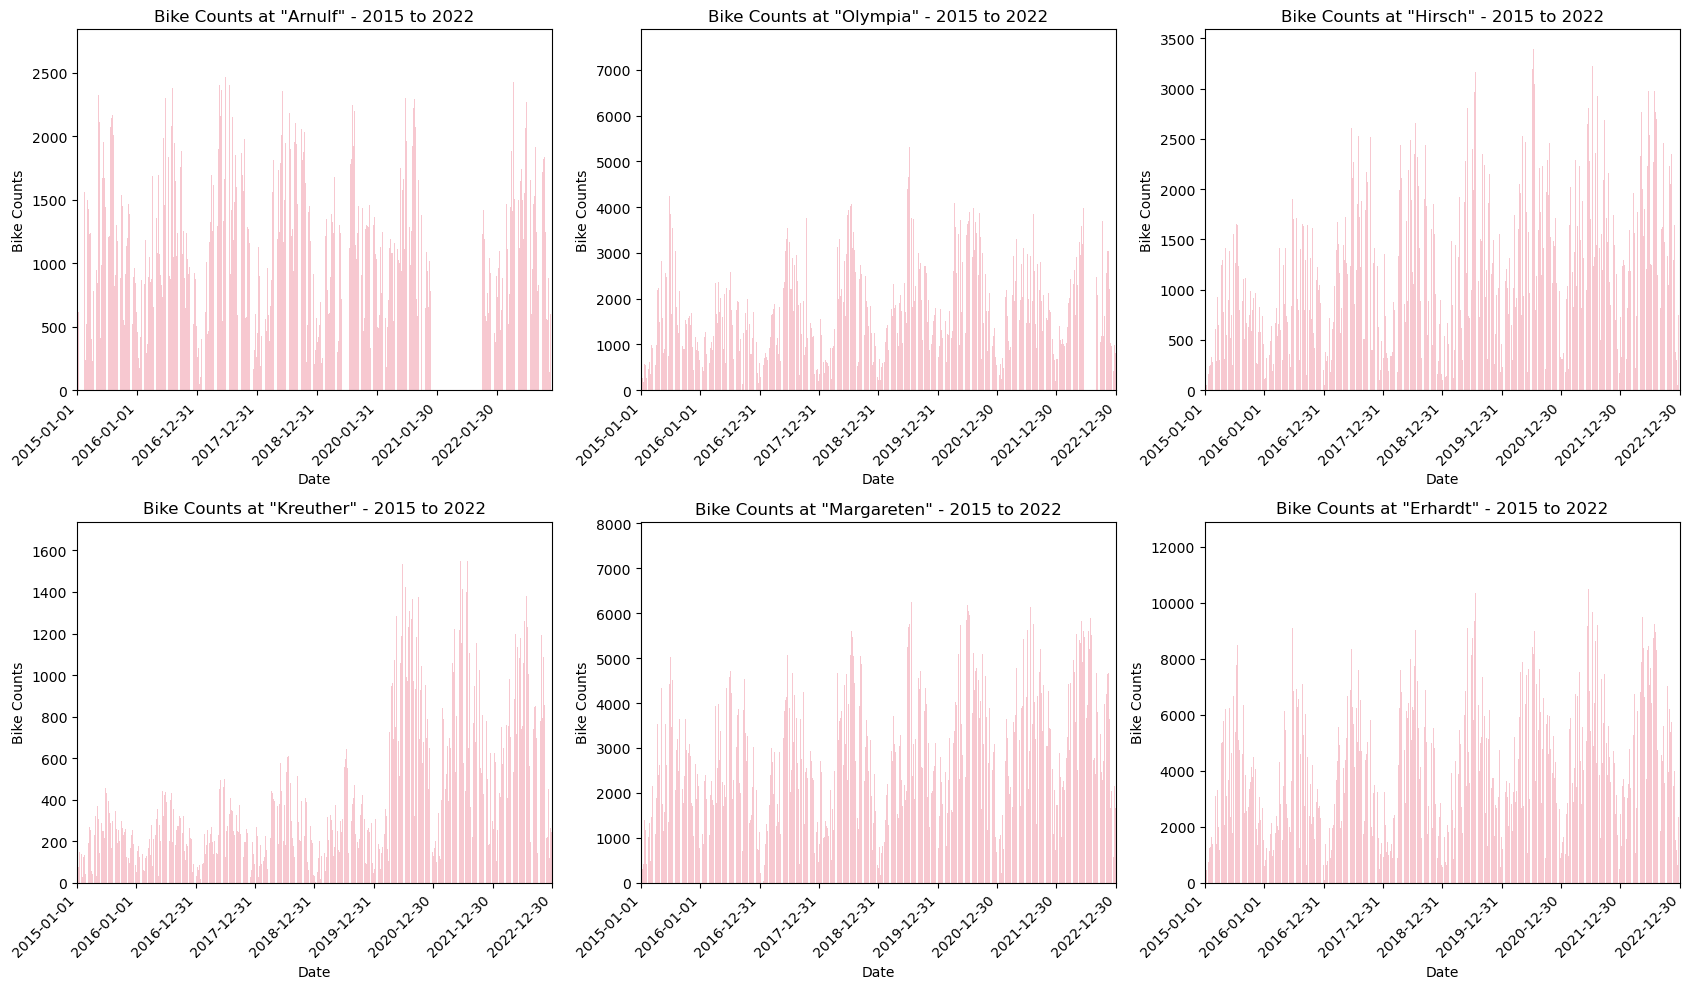

In [440]:
# Create a figure and six subplots
fig, axs = plt.subplots(2, 3, figsize=(17, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each unique location
for i, location in enumerate(unique_locations):
    # Filter the DataFrame for the current location
    df_location = df_munich[df_munich['Location'] == location]

    # Plotting
    # Set the current subplot
    plt.sca(axs[i])

    # Plot bike counts as a bar plot in grey color
    sns.barplot(data=df_location, x=df_location['Date'].dt.date, y='Total', color='pink')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    # Adjust layout to prevent overlap
    plt.gca().xaxis.set_major_locator(MultipleLocator(365))

    # Add title and labels
    plt.title(f'Bike Counts at "{location}" - 2015 to 2022')
    plt.xlabel('Date')
    plt.ylabel('Bike Counts')


plt.tight_layout()

# Show plot
plt.show()


In [441]:
df_location_erhardt = df_munich[df_munich['Location']=='Erhardt'].reset_index()
df_location_erhardt = df_location_erhardt[['Date','Location','Total','MinTemp','MaxTemp', 'AvgTemp','RainfallVolume']]

df_location_kreuther = df_munich[df_munich['Location']=='Kreuther'].reset_index()
df_location_kreuther = df_location_kreuther[['Date','Location','Total','MinTemp','MaxTemp', 'AvgTemp','RainfallVolume']]

df_location_Hirsch = df_munich[df_munich['Location']=='Hirsch'].reset_index()
df_location_Hirsch = df_location_Hirsch[['Date','Location','Total','MinTemp','MaxTemp', 'AvgTemp','RainfallVolume']]

df_location_Olympia = df_munich[df_munich['Location']=='Olympia'].reset_index()
df_location_Olympia = df_location_Olympia[['Date','Location','Total','MinTemp','MaxTemp', 'AvgTemp','RainfallVolume']]

df_location_Margareten = df_munich[df_munich['Location']=='Margareten'].reset_index()
df_location_Margareten = df_location_Margareten[['Date','Location','Total','MinTemp','MaxTemp', 'AvgTemp','RainfallVolume']]

df_location_Arnulf = df_munich[df_munich['Location']=='Arnulf'].reset_index()
df_location_Arnulf = df_location_Arnulf[['Date','Location','Total','MinTemp','MaxTemp', 'AvgTemp','RainfallVolume']]

print(df_location_erhardt)

           Date Location   Total  MinTemp  MaxTemp  AvgTemp  RainfallVolume
0    2015-01-01  Erhardt   137.0    -10.0      1.0    -4.50             0.0
1    2015-01-02  Erhardt   281.0    -11.8      3.9    -3.95             5.6
2    2015-01-03  Erhardt   269.0      0.2      4.2     2.20            26.4
3    2015-01-04  Erhardt   375.0      0.7      2.3     1.50             0.0
4    2015-01-05  Erhardt   976.0     -2.4      4.0     0.80             0.0
...         ...      ...     ...      ...      ...      ...             ...
2917 2022-12-27  Erhardt  1507.0      1.2      7.0     4.10             0.0
2918 2022-12-28  Erhardt  1789.0      0.6      9.5     5.05             0.0
2919 2022-12-29  Erhardt  2093.0      5.1     13.5     9.30             1.2
2920 2022-12-30  Erhardt  2111.0      4.3     12.7     8.50             1.5
2921 2022-12-31  Erhardt  1868.0     10.5     20.0    15.25             0.0

[2922 rows x 7 columns]


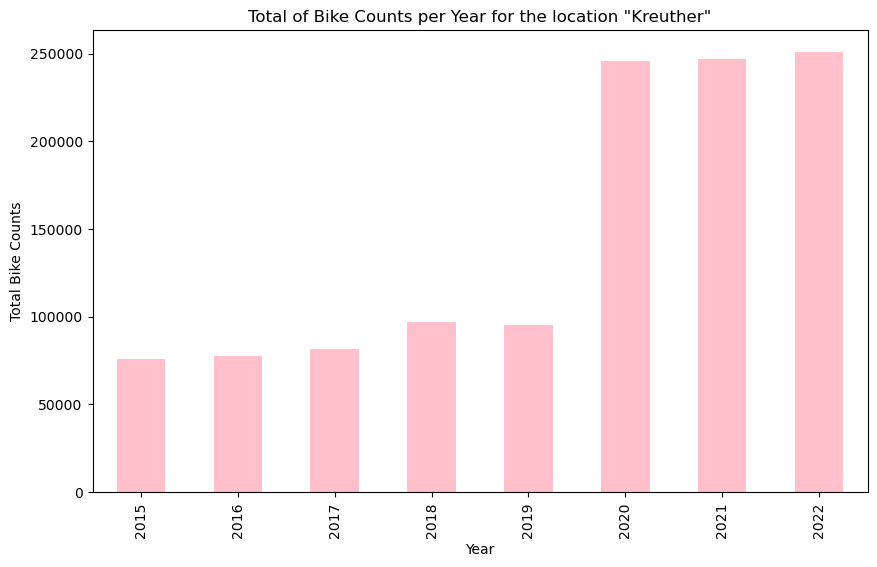

In [442]:
# Yearly aggregation
yearly_data = df_location_kreuther.groupby(df_location_kreuther['Date'].dt.year)['Total'].sum()
yearly_data.plot(kind='bar', xlabel='Year', ylabel='Total Bike Counts', color='pink', title='Total of Bike Counts per Year for the location "Kreuther"')
plt.show()

In [443]:
# # Convert 'datum' column to datetime
# df_munich['datum'] = pd.to_datetime(df_munich['datum'])

# # Create a figure with two subplots for temperature
# fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# # Plot min temperature
# sns.lineplot(data=df_munich, x='datum', y='min.temp', ax=axs[0], color='blue')
# axs[0].set_title('Min Temperature')
# axs[0].set_xlabel('Date')
# axs[0].set_ylabel('Temperature (°C)')

# # Plot max temperature
# sns.lineplot(data=df_munich, x='datum', y='max.temp', ax=axs[1], color='red')
# axs[1].set_title('Max Temperature')
# axs[1].set_xlabel('Date')
# axs[1].set_ylabel('Temperature (°C)')

# # Adjust layout
# plt.tight_layout()

# # Show plot
# plt.show()


/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

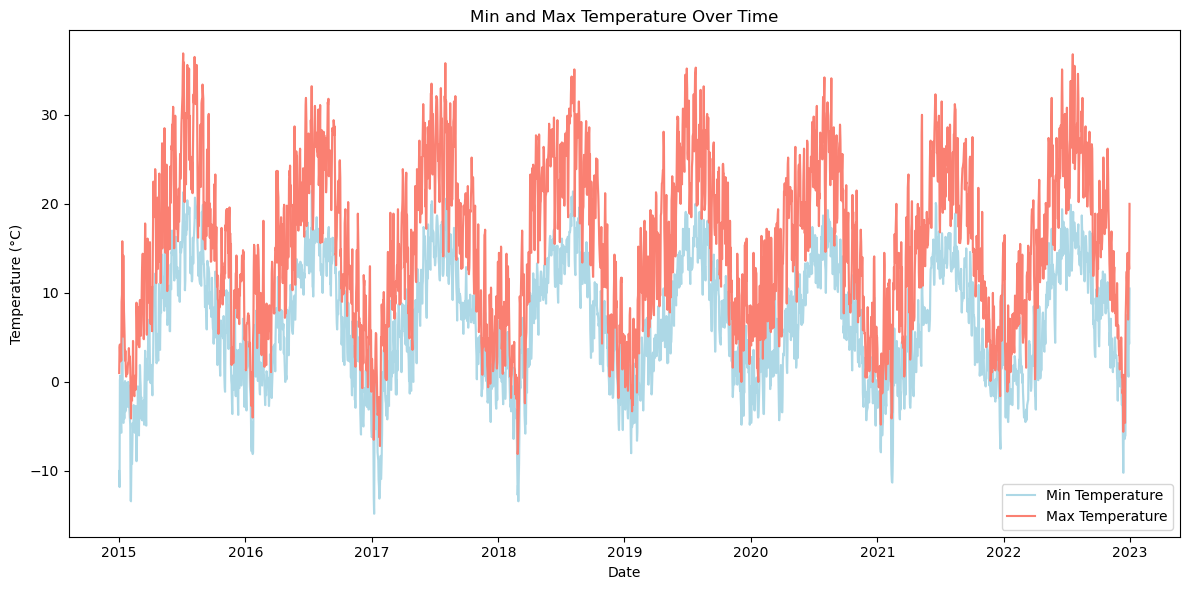

In [444]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_munich, x='Date', y='MinTemp', color='lightblue', label='Min Temperature')

sns.lineplot(data=df_munich, x='Date', y='MaxTemp', color='salmon', label='Max Temperature')

# Set title and labels
plt.title('Min and Max Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.legend()

plt.tight_layout()
plt.show()


/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


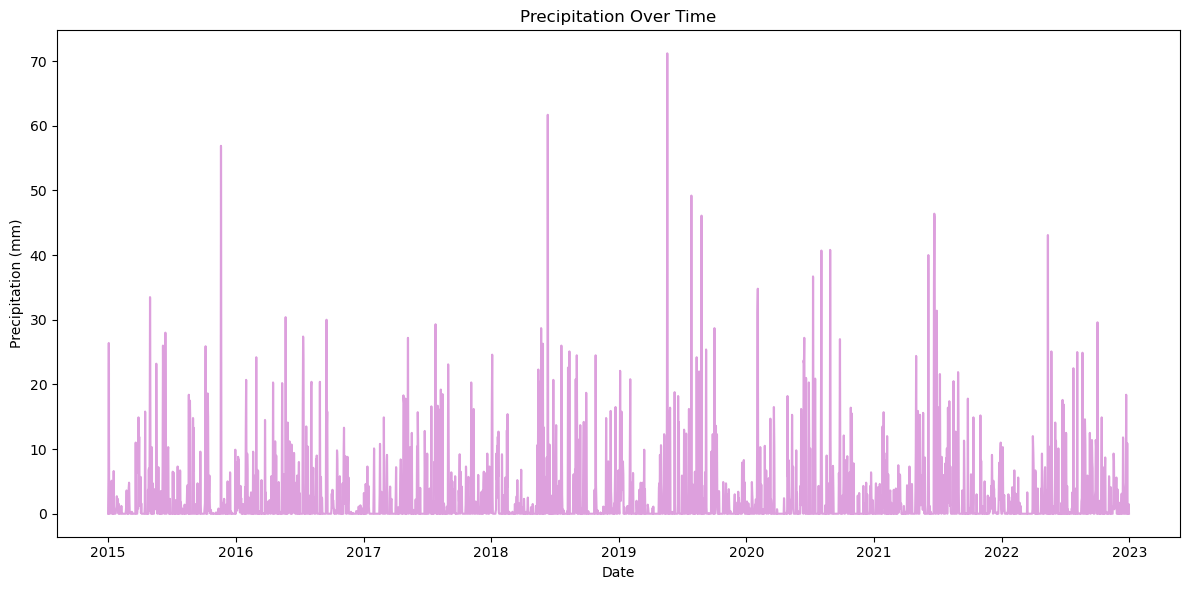

In [445]:
# Create a figure for precipitation plot
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_munich, x='Date', y='RainfallVolume', color='plum')

# Set title and labels
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')

# Show plot
plt.tight_layout()
plt.show()


/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

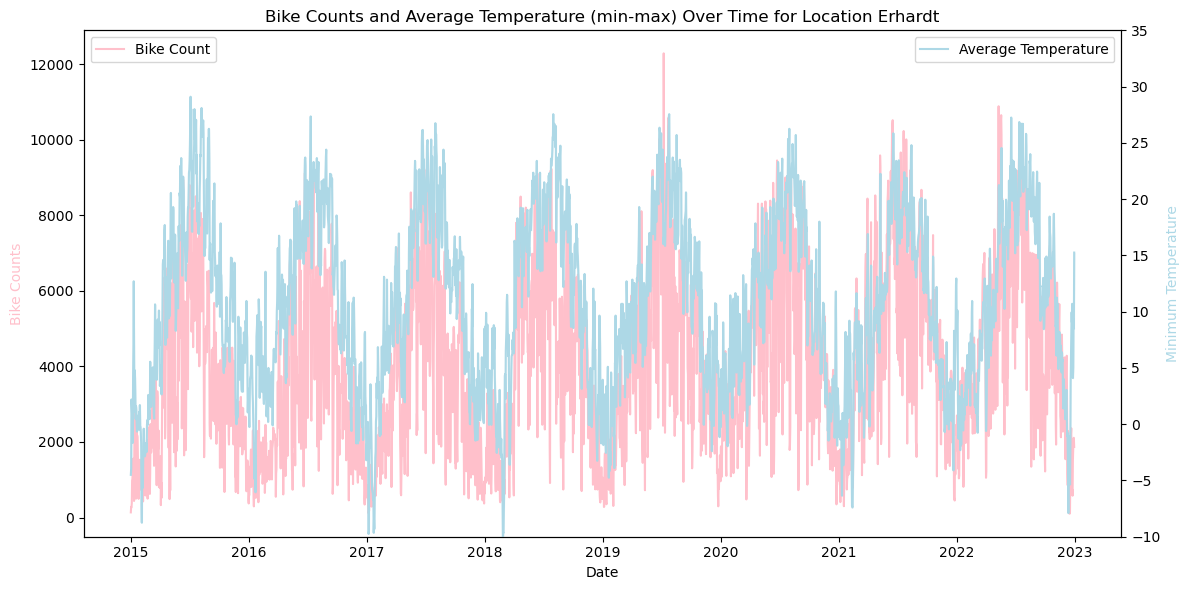

In [446]:
# Create a figure with one subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bike counts for 'Erhardt' on the primary y-axis
sns.lineplot(data=df_munich[df_munich['Location'] == 'Erhardt'], x='Date', y='Total', color='pink', ax=ax1, label= 'Bike Count')
ax1.set_ylabel('Bike Counts', color='pink')

# Create a secondary y-axis for precipitation
ax2 = ax1.twinx()
sns.lineplot(data=df_munich, x='Date', y='AvgTemp', color='lightblue', label='Average Temperature')
ax2.set_ylabel('Minimum Temperature', color='lightblue')
# Set y-axis limits for the temperature plot
ax2.set_ylim(-10, 35)

# Set title and labels
plt.title('Bike Counts and Average Temperature (min-max) Over Time for Location Erhardt')
ax1.set_xlabel('Date')



# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# Show plot
plt.tight_layout()
plt.show()


## Checking correlation analysis

The correlation coefficient is:  0.7482890264985614


Text(0, 0.5, 'Average Temperature (°C)')

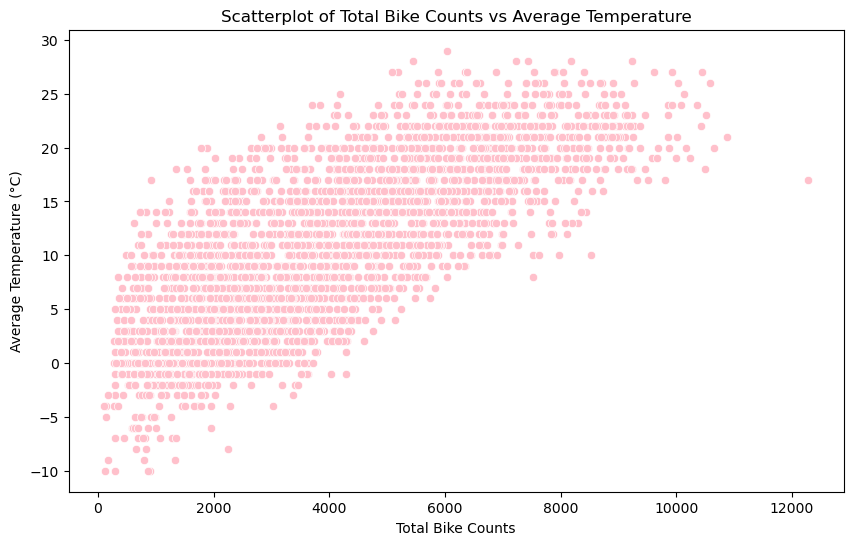

In [447]:
# Calculate average temperature
#df_location_erhardt['AvgTemp'] = (df_location_erhardt['min.temp'] + df_location_erhardt['max.temp']) / 2
# Round 'min.temp', 'max.temp' and 'avg.temp' columns to 0 decimal places
df_location_erhardt['MinTemp'] = df_location_erhardt['MinTemp'].round(0)
df_location_erhardt['MaxTemp'] = df_location_erhardt['MaxTemp'].round(0)
df_location_erhardt['AvgTemp'] = df_location_erhardt['AvgTemp'].round(0)
df_location_erhardt['RainfallVolume'] = df_location_erhardt['RainfallVolume'].round(0)

correlation_coef = df_location_erhardt['Total'].corr(df_location_erhardt['AvgTemp'])
print("The correlation coefficient is: ", correlation_coef)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_location_erhardt, x='Total', y='AvgTemp', color='pink')

plt.title('Scatterplot of Total Bike Counts vs Average Temperature')
plt.xlabel('Total Bike Counts')
plt.ylabel('Average Temperature (°C)')

<Figure size 1000x600 with 0 Axes>

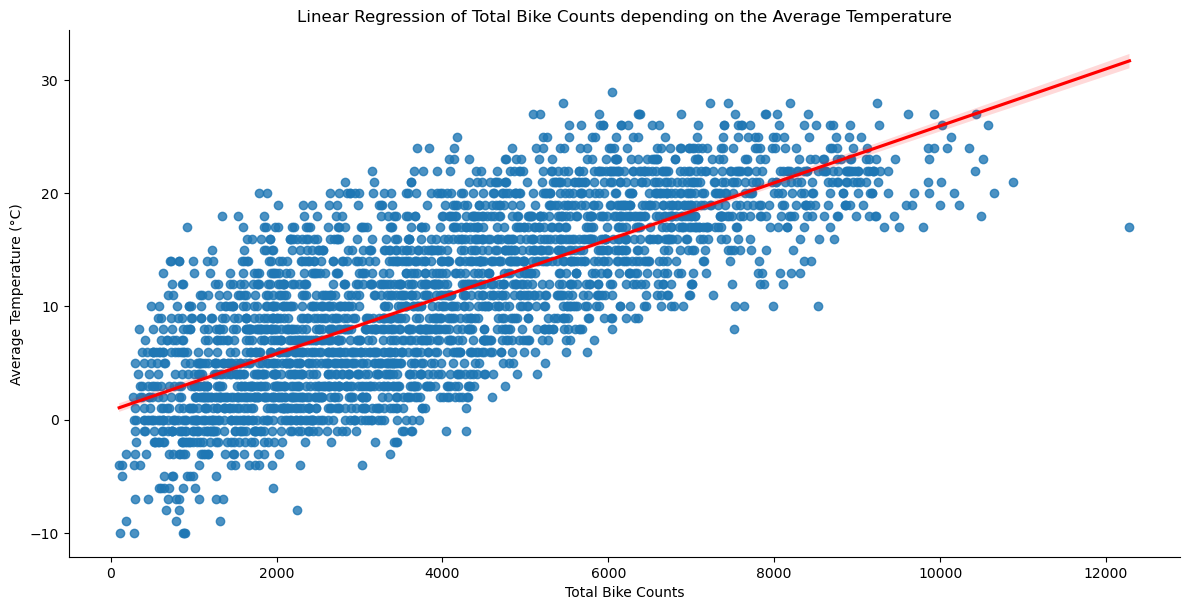

In [448]:
# Lets now try to perform a linear regression by using lmplot from Seaborn
# Plotting the scatterplot with linear regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=df_location_erhardt, x='Total', y='AvgTemp', height=6, aspect=2, line_kws={'color': 'red'})

# Adding title and labels
plt.title('Linear Regression of Total Bike Counts depending on the Average Temperature')
plt.xlabel('Total Bike Counts')
plt.ylabel('Average Temperature (°C)')

# Show plot
plt.show()


## Statistics for Munich

### Location Erhardt

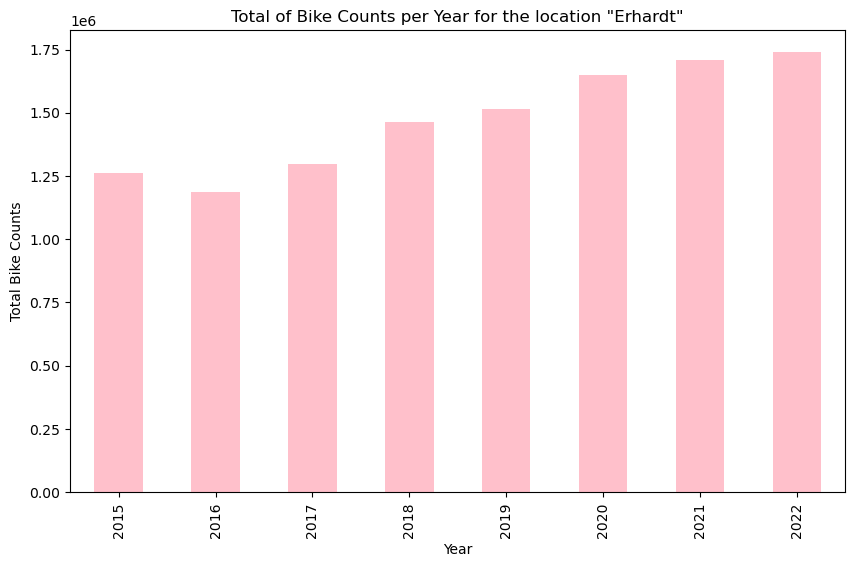

0)  1261128.0
1 ) -72845.0
2 ) 109564.0
3 ) 165247.0
4 ) 53760.0
5 ) 130762.0
6 ) 60153.0
7 ) 31590.0


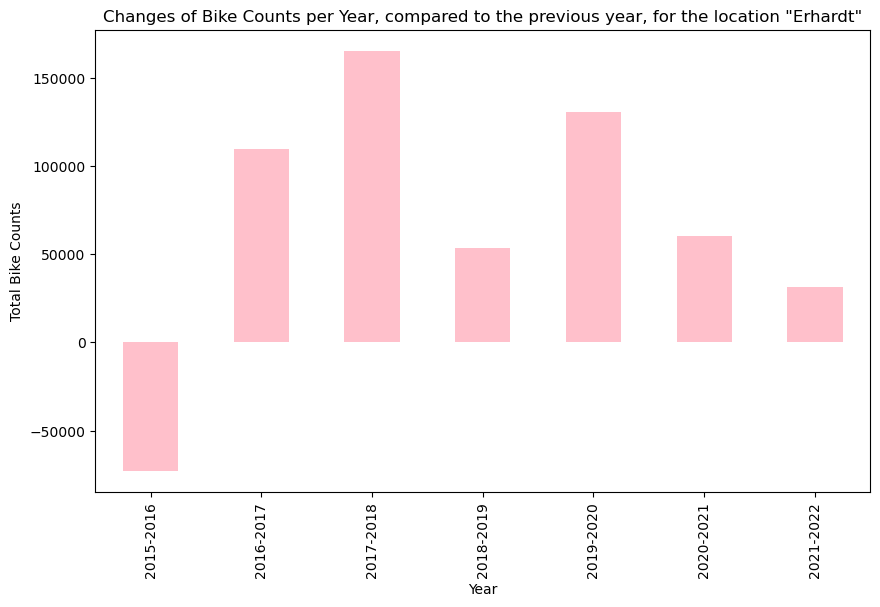

Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag): -0.3034754119821047
MEAN value for Total for all years in the location Erhardt in Munich:  4045.841889117043
MODE value for Total for all years in the location Erhardt in Munich:  2207.0
MAX value for Total for all years in the location Erhardt in Munich:  12283.0


In [449]:
# Calculate the Spearman correlation coefficient between 'Total' and 'RainfallVolume'

# Yearly aggregation
yearly_data = df_location_erhardt.groupby(df_location_erhardt['Date'].dt.year)['Total'].sum()
yearly_data.plot(kind='bar', xlabel='Year', ylabel='Total Bike Counts', color='pink', title='Total of Bike Counts per Year for the location "Erhardt"')
plt.show()
print("0) ", yearly_data.iloc[0])

yearly_data_difference = pd.Series(dtype=int)
#yearly_data_difference = pd.concat([pd.Series([yearly_data.iloc[0]], index=['2015']), yearly_data_difference])

for i in range(len(yearly_data)-1):
    diff=yearly_data.iloc[i+1]-yearly_data.iloc[i]
    print(i+1, ")", diff)
    yearly_data_difference = pd.concat([yearly_data_difference, pd.Series([diff], index=[f'{yearly_data.index[i]}-{yearly_data.index[i+1]}'])])

spearman_corr = df_location_erhardt['Total'].corr(df_location_erhardt['RainfallVolume'], method='spearman')

yearly_data_difference.plot(kind='bar', xlabel='Year', ylabel='Total Bike Counts', color='pink', title='Changes of Bike Counts per Year, compared to the previous year, for the location "Erhardt"')
plt.show()


print("Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag):", spearman_corr)

print("MEAN value for Total for all years in the location Erhardt in Munich: ", df_location_erhardt['Total'].mean())
print("MODE value for Total for all years in the location Erhardt in Munich: ", max(df_location_erhardt['Total'].mode())) # Using max to avoid the 0 value
print("MAX value for Total for all years in the location Erhardt in Munich: ", df_location_erhardt['Total'].max())


In [450]:
## Years
df_m_e_2015 = df_location_erhardt[df_location_erhardt["Date"] < "2016-01-01"]
df_m_e_2016 = df_location_erhardt[(df_location_erhardt["Date"] >= "2016-01-01") & (df_location_erhardt["Date"] < "2017-01-01")]
df_m_e_2017 = df_location_erhardt[(df_location_erhardt["Date"] >= "2017-01-01") & (df_location_erhardt["Date"] < "2018-01-01")]
df_m_e_2018 = df_location_erhardt[(df_location_erhardt["Date"] >= "2018-01-01") & (df_location_erhardt["Date"] < "2019-01-01")]
df_m_e_2019 = df_location_erhardt[(df_location_erhardt["Date"] >= "2019-01-01") & (df_location_erhardt["Date"] < "2020-01-01")]
df_m_e_2020 = df_location_erhardt[(df_location_erhardt["Date"] >= "2020-01-01") & (df_location_erhardt["Date"] < "2021-01-01")]
df_m_e_2021 = df_location_erhardt[(df_location_erhardt["Date"] >= "2021-01-01") & (df_location_erhardt["Date"] < "2022-01-01")]
df_m_e_2022 = df_location_erhardt[(df_location_erhardt["Date"] >= "2022-01-01") & (df_location_erhardt["Date"] < "2023-01-01")]

## For Statistics
years_statistics = pd.Series(dtype=int)
#years_statistics = pd.concat([years_statistics, pd.Series([mean])])


### 2015

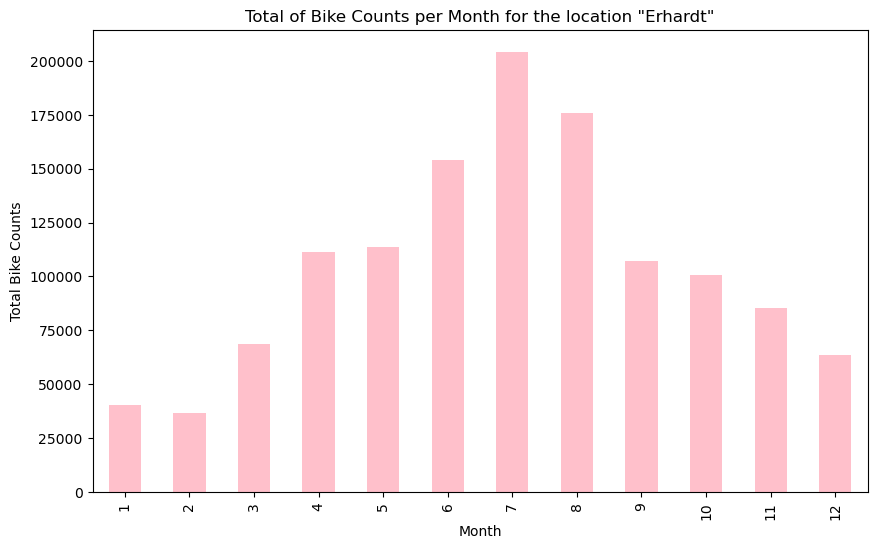

0)  40517.0
1 ) -3995.0
2 ) 32267.0
3 ) 42558.0
4 ) 2505.0
5 ) 40058.0
6 ) 50207.0
7 ) -28520.0
8 ) -68489.0
9 ) -6456.0
10 ) -15428.0
11 ) -21731.0
Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag): -0.22622110413625127
MEAN value for Total for 2015 in the location Erhardt in Munich:  3455.145205479452
MODE value for Total for 2015 in the location Erhardt in Munich:  4115.0
MAX value for Total for 2015 in the location Erhardt in Munich:  8938.0


0    3455.145205
dtype: float64

In [451]:
# 2015
# Monthly aggregation
monthly_data_15 = df_m_e_2015.groupby(df_m_e_2015['Date'].dt.month)['Total'].sum()
monthly_data_15.plot(kind='bar', xlabel='Month', ylabel='Total Bike Counts', color='pink', title='Total of Bike Counts per Month for the location "Erhardt"')
plt.show()
print("0) ", monthly_data_15.iloc[0])

month_data_diff = pd.Series(dtype=int)

for i in range(len(monthly_data_15)-1):
    diff=monthly_data_15.iloc[i+1]-monthly_data_15.iloc[i]
    print(i+1, ")", diff)
    month_data_diff = pd.concat([month_data_diff, pd.Series([diff], index=[f'{monthly_data_15.index[i]}-{monthly_data_15.index[i+1]}'])])

spearman_corr = df_m_e_2015['Total'].corr(df_m_e_2015['RainfallVolume'], method='spearman')

print("Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag):", spearman_corr)
mean = df_m_e_2015['Total'].mean()
print("MEAN value for Total for 2015 in the location Erhardt in Munich: ", mean)
print("MODE value for Total for 2015 in the location Erhardt in Munich: ", max(df_m_e_2015['Total'].mode())) # Using max to avoid the 0 value
print("MAX value for Total for 2015 in the location Erhardt in Munich: ", df_m_e_2015['Total'].max())
years_statistics = pd.concat([years_statistics, pd.Series([mean])])
years_statistics

### 2016

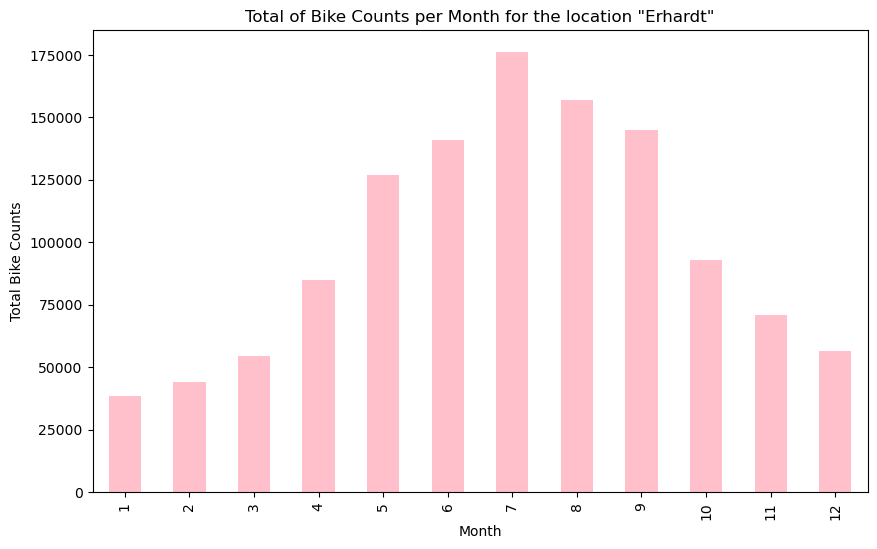

0)  38532.0
1 ) 5523.0
2 ) 10444.0
3 ) 30449.0
4 ) 41849.0
5 ) 14205.0
6 ) 35089.0
7 ) -19109.0
8 ) -11923.0
9 ) -52124.0
10 ) -22031.0
11 ) -14425.0
Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag): -0.2725075601778099
MEAN value for Total for 2016 in the location Erhardt in Munich:  3246.6748633879783
MODE value for Total for 2016 in the location Erhardt in Munich:  2888.0
MAX value for Total for 2016 in the location Erhardt in Munich:  9113.0


0    3455.145205
0    3246.674863
dtype: float64

In [452]:
# 2016
# Monthly aggregation
monthly_data_16 = df_m_e_2016.groupby(df_m_e_2016['Date'].dt.month)['Total'].sum()
monthly_data_16.plot(kind='bar', xlabel='Month', ylabel='Total Bike Counts', color='pink', title='Total of Bike Counts per Month for the location "Erhardt"')
plt.show()
print("0) ", monthly_data_16.iloc[0])

month_data_diff = pd.Series(dtype=int)

for i in range(len(monthly_data_16)-1):
    diff=monthly_data_16.iloc[i+1]-monthly_data_16.iloc[i]
    print(i+1, ")", diff)
    month_data_diff = pd.concat([month_data_diff, pd.Series([diff], index=[f'{monthly_data_16.index[i]}-{monthly_data_16.index[i+1]}'])])

spearman_corr = df_m_e_2016['Total'].corr(df_m_e_2016['RainfallVolume'], method='spearman')

print("Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag):", spearman_corr)
mean = df_m_e_2016['Total'].mean()
print("MEAN value for Total for 2016 in the location Erhardt in Munich: ", mean)
print("MODE value for Total for 2016 in the location Erhardt in Munich: ", max(df_m_e_2016['Total'].mode())) # Using max to avoid the 0 value
print("MAX value for Total for 2016 in the location Erhardt in Munich: ", df_m_e_2016['Total'].max())
years_statistics = pd.concat([years_statistics, pd.Series([mean])])
years_statistics

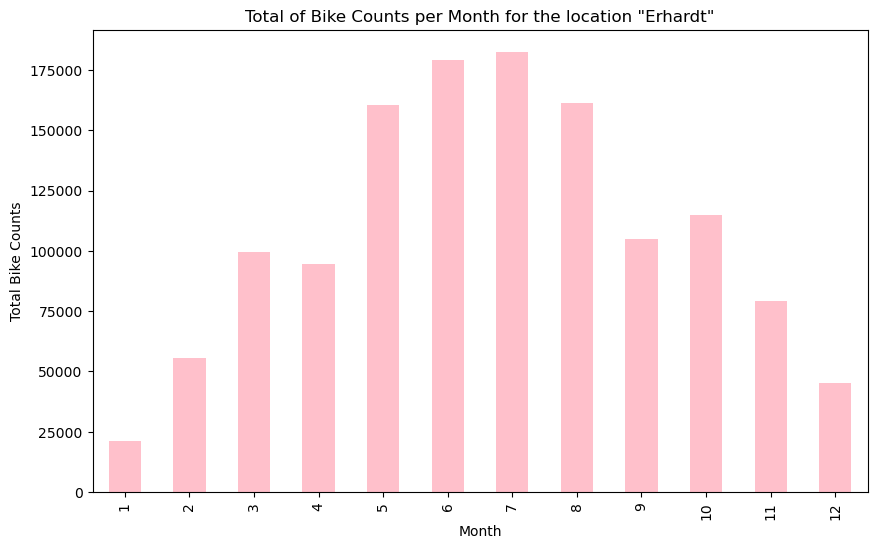

0)  21103.0
1 ) 34339.0
2 ) 44253.0
3 ) -5251.0
4 ) 66116.0
5 ) 18509.0
6 ) 3375.0
7 ) -21202.0
8 ) -56361.0
9 ) 9923.0
10 ) -35763.0
11 ) -33919.0
Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag): -0.289252800365706
MEAN value for Total for 2016 in the location Erhardt in Munich:  3555.745205479452
MODE value for Total for 2016 in the location Erhardt in Munich:  2207.0
MAX value for Total for 2016 in the location Erhardt in Munich:  9207.0


0    3455.145205
0    3246.674863
0    3555.745205
dtype: float64

In [453]:
# 2017
# Monthly aggregation
monthly_data_17 = df_m_e_2017.groupby(df_m_e_2017['Date'].dt.month)['Total'].sum()
monthly_data_17.plot(kind='bar', xlabel='Month', ylabel='Total Bike Counts', color='pink', title='Total of Bike Counts per Month for the location "Erhardt"')
plt.show()
print("0) ", monthly_data_17.iloc[0])

month_data_diff = pd.Series(dtype=int)

for i in range(len(monthly_data_17)-1):
    diff=monthly_data_17.iloc[i+1]-monthly_data_17.iloc[i]
    print(i+1, ")", diff)
    month_data_diff = pd.concat([month_data_diff, pd.Series([diff], index=[f'{monthly_data_17.index[i]}-{monthly_data_17.index[i+1]}'])])

spearman_corr = df_m_e_2017['Total'].corr(df_m_e_2017['RainfallVolume'], method='spearman')

print("Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag):", spearman_corr)

mean =  df_m_e_2017['Total'].mean()
print("MEAN value for Total for 2016 in the location Erhardt in Munich: ", mean)
print("MODE value for Total for 2016 in the location Erhardt in Munich: ", max(df_m_e_2017['Total'].mode())) # Using max to avoid the 0 value
print("MAX value for Total for 2016 in the location Erhardt in Munich: ", df_m_e_2017['Total'].max())
years_statistics = pd.concat([years_statistics, pd.Series([mean])])
years_statistics

In [454]:
# 2018
# Monthly aggregation
monthly_data_18 = df_m_e_2018.groupby(df_m_e_2018['Date'].dt.month)['Total'].sum()
#monthly_data_18.plot(kind='bar', xlabel='Month', ylabel='Total Bike Counts', color='pink', title='Total of Bike Counts per Month for the location "Erhardt"')
#plt.show()
print("0) ", monthly_data_18.iloc[0])

month_data_diff = pd.Series(dtype=int)

for i in range(len(monthly_data_18)-1):
    diff=monthly_data_18.iloc[i+1]-monthly_data_18.iloc[i]
    print(i+1, ")", diff)
    month_data_diff = pd.concat([month_data_diff, pd.Series([diff], index=[f'{monthly_data_18.index[i]}-{monthly_data_18.index[i+1]}'])])

spearman_corr = df_m_e_2018['Total'].corr(df_m_e_2018['RainfallVolume'], method='spearman')

print("Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag):", spearman_corr)

mean =  df_m_e_2018['Total'].mean()
print("MEAN value for Total for 2018 in the location Erhardt in Munich: ", mean)
print("MODE value for Total for 2018 in the location Erhardt in Munich: ", max(df_m_e_2018['Total'].mode())) # Using max to avoid the 0 value
print("MAX value for Total for 2018 in the location Erhardt in Munich: ", df_m_e_2018['Total'].max())
years_statistics = pd.concat([years_statistics, pd.Series([mean])])
years_statistics

0)  61542.0
1 ) -25910.0
2 ) 25930.0
3 ) 110251.0
4 ) 206.0
5 ) 4467.0
6 ) 29993.0
7 ) -67411.0
8 ) 7293.0
9 ) -10882.0
10 ) -34975.0
11 ) -44355.0
Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag): -0.303333308694314
MEAN value for Total for 2018 in the location Erhardt in Munich:  4008.476712328767
MODE value for Total for 2018 in the location Erhardt in Munich:  6871.0
MAX value for Total for 2018 in the location Erhardt in Munich:  9228.0


0    3455.145205
0    3246.674863
0    3555.745205
0    4008.476712
dtype: float64

In [455]:
# 2019
# Monthly aggregation
monthly_data_19 = df_m_e_2019.groupby(df_m_e_2019['Date'].dt.month)['Total'].sum()

print("0) ", monthly_data_19.iloc[0])

month_data_diff = pd.Series(dtype=int)

for i in range(len(monthly_data_19)-1):
    diff=monthly_data_19.iloc[i+1]-monthly_data_19.iloc[i]
    print(i+1, ")", diff)
    month_data_diff = pd.concat([month_data_diff, pd.Series([diff], index=[f'{monthly_data_19.index[i]}-{monthly_data_19.index[i+1]}'])])

spearman_corr = df_m_e_2019['Total'].corr(df_m_e_2019['RainfallVolume'], method='spearman')

print("Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag):", spearman_corr)

mean =  df_m_e_2019['Total'].mean()
print("MEAN value for Total for 2018 in the location Erhardt in Munich: ", mean)
print("MODE value for Total for 2018 in the location Erhardt in Munich: ", max(df_m_e_2019['Total'].mode())) # Using max to avoid the 0 value
print("MAX value for Total for 2018 in the location Erhardt in Munich: ", df_m_e_2019['Total'].max())
years_statistics = pd.concat([years_statistics, pd.Series([mean])])
years_statistics

0)  42753.0
1 ) 26737.0
2 ) 28605.0
3 ) 30095.0
4 ) 6283.0
5 ) 68702.0
6 ) 15739.0
7 ) -53801.0
8 ) -20447.0
9 ) -6930.0
10 ) -39022.0
11 ) -23179.0
Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag): -0.38409464220863654
MEAN value for Total for 2018 in the location Erhardt in Munich:  4155.764383561644
MODE value for Total for 2018 in the location Erhardt in Munich:  2161.0
MAX value for Total for 2018 in the location Erhardt in Munich:  12283.0


0    3455.145205
0    3246.674863
0    3555.745205
0    4008.476712
0    4155.764384
dtype: float64

In [456]:
# 2020
# Monthly aggregation
monthly_data_20 = df_m_e_2020.groupby(df_m_e_2020['Date'].dt.month)['Total'].sum()

print("0) ", monthly_data_20.iloc[0])

month_data_diff = pd.Series(dtype=int)

for i in range(len(monthly_data_20)-1):
    diff=monthly_data_20.iloc[i+1]-monthly_data_20.iloc[i]
    print(i+1, ")", diff)
    month_data_diff = pd.concat([month_data_diff, pd.Series([diff], index=[f'{monthly_data_20.index[i]}-{monthly_data_20.index[i+1]}'])])

spearman_corr = df_m_e_2020['Total'].corr(df_m_e_2020['RainfallVolume'], method='spearman')

print("Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag):", spearman_corr)

mean =  df_m_e_2020['Total'].mean()
print("MEAN value for Total for 2018 in the location Erhardt in Munich: ", mean)
print("MODE value for Total for 2018 in the location Erhardt in Munich: ", max(df_m_e_2020['Total'].mode())) # Using max to avoid the 0 value
print("MAX value for Total for 2018 in the location Erhardt in Munich: ", df_m_e_2020['Total'].max())
years_statistics = pd.concat([years_statistics, pd.Series([mean])])
years_statistics

# 2021
# Monthly aggregation
monthly_data_21 = df_m_e_2021.groupby(df_m_e_2021['Date'].dt.month)['Total'].sum()

print("0) ", monthly_data_21.iloc[0])

month_data_diff = pd.Series(dtype=int)

for i in range(len(monthly_data_21)-1):
    diff=monthly_data_21.iloc[i+1]-monthly_data_21.iloc[i]
    print(i+1, ")", diff)
    month_data_diff = pd.concat([month_data_diff, pd.Series([diff], index=[f'{monthly_data_21.index[i]}-{monthly_data_21.index[i+1]}'])])

spearman_corr = df_m_e_2021['Total'].corr(df_m_e_2021['RainfallVolume'], method='spearman')

print("Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag):", spearman_corr)

mean =  df_m_e_2021['Total'].mean()
print("MEAN value for Total for 2021 in the location Erhardt in Munich: ", mean)
print("MODE value for Total for 2021 in the location Erhardt in Munich: ", max(df_m_e_2021['Total'].mode())) # Using max to avoid the 0 value
print("MAX value for Total for 2021 in the location Erhardt in Munich: ", df_m_e_2021['Total'].max())
years_statistics = pd.concat([years_statistics, pd.Series([mean])])
years_statistics

# 2022
# Monthly aggregation
monthly_data_22 = df_m_e_2022.groupby(df_m_e_2022['Date'].dt.month)['Total'].sum()

print("0) ", monthly_data_22.iloc[0])

month_data_diff = pd.Series(dtype=int)

for i in range(len(monthly_data_22)-1):
    diff=monthly_data_22.iloc[i+1]-monthly_data_22.iloc[i]
    print(i+1, ")", diff)
    month_data_diff = pd.concat([month_data_diff, pd.Series([diff], index=[f'{monthly_data_22.index[i]}-{monthly_data_22.index[i+1]}'])])

spearman_corr = df_m_e_2022['Total'].corr(df_m_e_2022['RainfallVolume'], method='spearman')

print("Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag):", spearman_corr)

mean =  df_m_e_2022['Total'].mean()
print("MEAN value for Total for 2022 in the location Erhardt in Munich: ", mean)
print("MODE value for Total for 2022 in the location Erhardt in Munich: ", max(df_m_e_2022['Total'].mode())) # Using max to avoid the 0 value
print("MAX value for Total for 2022 in the location Erhardt in Munich: ", df_m_e_2022['Total'].max())
years_statistics = pd.concat([years_statistics, pd.Series([mean])])
years_statistics

0)  87377.0
1 ) -11620.0
2 ) 29328.0
3 ) 57131.0
4 ) 3703.0
5 ) -7557.0
6 ) 59340.0
7 ) -43100.0
8 ) 2921.0
9 ) -39358.0
10 ) -21509.0
11 ) -48404.0
Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag): -0.43292060890472295
MEAN value for Total for 2018 in the location Erhardt in Munich:  4501.68306010929
MODE value for Total for 2018 in the location Erhardt in Munich:  5873.0
MAX value for Total for 2018 in the location Erhardt in Munich:  9860.0
0)  44724.0
1 ) 46806.0
2 ) 37835.0
3 ) 14579.0
4 ) 9291.0
5 ) 78119.0
6 ) -17242.0
7 ) -52727.0
8 ) 32740.0
9 ) -32367.0
10 ) -55184.0
11 ) -30911.0
Spearman correlation coefficient between Total Bike Counts and Rainfall (niederschlag): -0.2969402837022326
MEAN value for Total for 2021 in the location Erhardt in Munich:  4678.819178082192
MODE value for Total for 2021 in the location Erhardt in Munich:  7363.0
MAX value for Total for 2021 in the location Erhardt in Munich:  10514.0
0)  79734.0
1 ) 11048.0
2 

0    3455.145205
0    3246.674863
0    3555.745205
0    4008.476712
0    4155.764384
0    4501.683060
0    4678.819178
0    4765.367123
dtype: float64

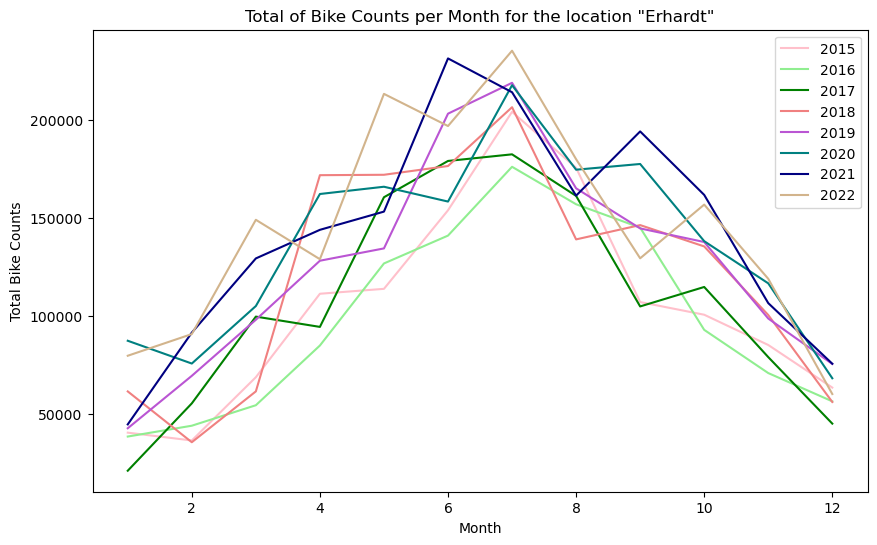

In [457]:
monthly_data_15.plot(kind='line', xlabel='Month', ylabel='Total Bike Counts', color='pink', title='Total of Bike Counts per Month for the location "Erhardt"', label = '2015')
monthly_data_16.plot(kind='line', xlabel='Month', ylabel='Total Bike Counts', color='lightgreen', label='2016')
monthly_data_17.plot(kind='line', xlabel='Month', ylabel='Total Bike Counts', color='green', label='2017')
monthly_data_18.plot(kind='line', xlabel='Month', ylabel='Total Bike Counts', color='lightcoral', label='2018')
monthly_data_19.plot(kind='line', xlabel='Month', ylabel='Total Bike Counts', color='mediumorchid', label='2019')
monthly_data_20.plot(kind='line', xlabel='Month', ylabel='Total Bike Counts', color='teal', label='2020')
monthly_data_21.plot(kind='line', xlabel='Month', ylabel='Total Bike Counts', color='navy', label='2021')
monthly_data_22.plot(kind='line', xlabel='Month', ylabel='Total Bike Counts', color='tan', label='2022')

# Add legend
plt.legend()
plt.show()


### Model Training - Date and Total only

In [458]:
df_location_erhardt = df_location_erhardt.set_index(['Date'])

                  Total
Date                   
2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
...                 ...
2022-12-27  1122.333333
2022-12-28  1218.666667
2022-12-29  1384.583333
2022-12-30  1548.916667
2022-12-31  1612.166667

[2922 rows x 1 columns]                  Total
Date                  
2015-01-01         NaN
2015-01-02         NaN
2015-01-03         NaN
2015-01-04         NaN
2015-01-05         NaN
...                ...
2022-12-27  767.490756
2022-12-28  773.016445
2022-12-29  723.644370
2022-12-30  633.346876
2022-12-31  623.238730

[2922 rows x 1 columns]


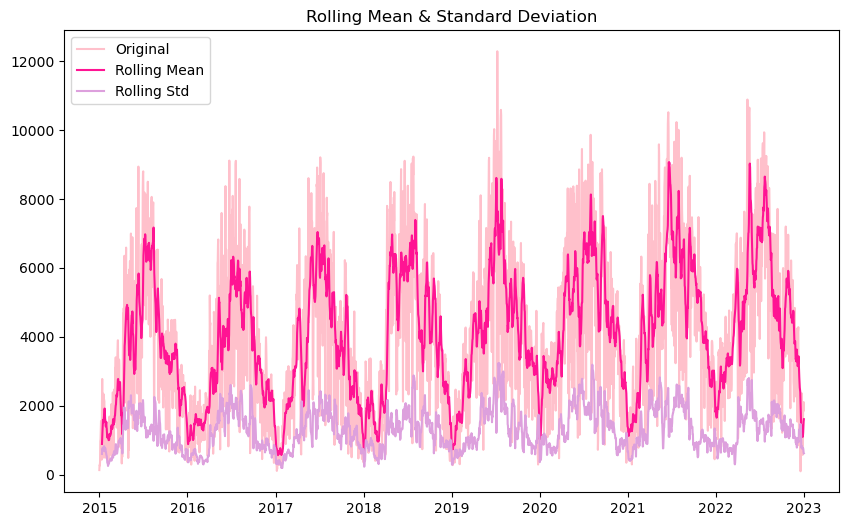

In [459]:
df_m_e_model = df_location_erhardt
df_m_e_model = df_m_e_model.drop(columns={'Location','MinTemp','MaxTemp','AvgTemp','RainfallVolume'})
#Determine rolling statistics
rolmean = df_m_e_model.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = df_m_e_model.rolling(window=12).std()
print(rolmean,rolstd)

#Plot rolling statistics
orig = plt.plot(df_m_e_model, color='pink', label='Original')
mean = plt.plot(rolmean, color='deeppink', label='Rolling Mean')
std = plt.plot(rolstd, color='plum', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [460]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df_m_e_model['Total'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

from statsmodels.tsa.stattools import kpss

# Perform KPSS test
result = kpss(df_m_e_model)

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

Results of Dickey Fuller Test:
Test Statistic                   -3.669835
p-value                           0.004558
#Lags Used                       28.000000
Number of Observations Used    2893.000000
Critical Value (1%)              -3.432612
Critical Value (5%)              -2.862540
Critical Value (10%)             -2.567302
dtype: float64
Test Statistic: 1.113281649902229
P-value: 0.01


/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_41341/3326370206.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_m_e_model)


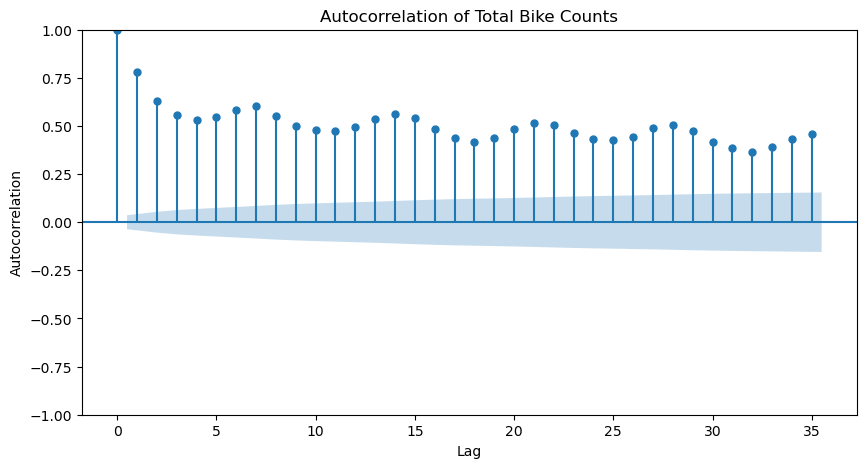

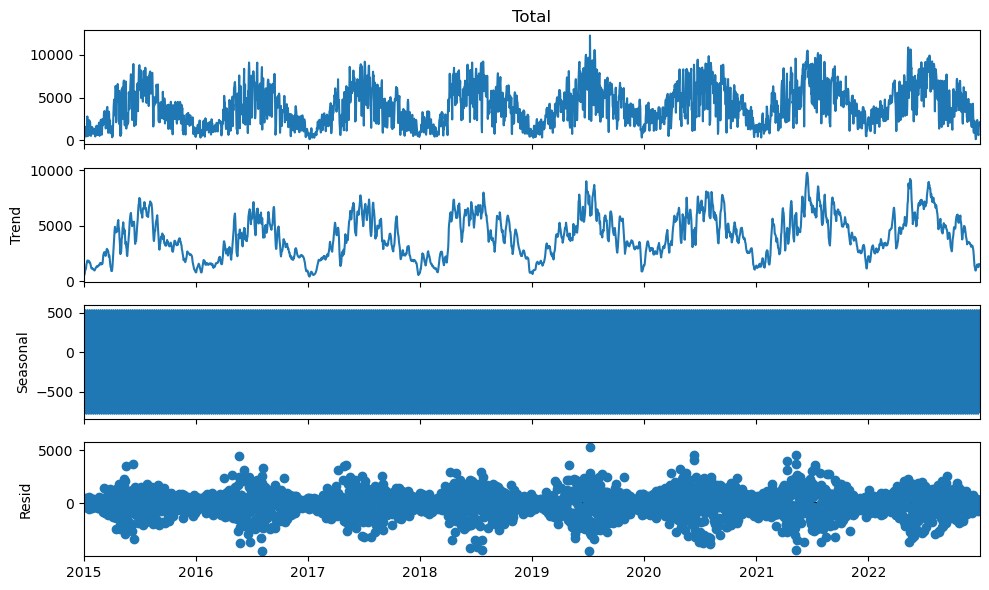

In [461]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(10, 5))

plot_acf(df_m_e_model, ax=ax, title='Autocorrelation of Total Bike Counts')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

## Some notes from Medium:
# The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF). In other words,
# >Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.
# >Autocorrelation measures the relationship between a variable’s current value and its past values.
# >An autocorrelation of +1 represents a perfect positive correlation, while an autocorrelation of negative 1 represents a perfect negative correlation.
# Important note: make sure your data doesn’t have NA values, otherwise the ACF will fail.

res = seasonal_decompose(df_m_e_model['Total'], model = "additive",period = 7)
res.plot()
plt.show()

In [462]:
# Following: https://mlpills.dev/time-series/how-to-train-a-sarima-model-step-by-step/

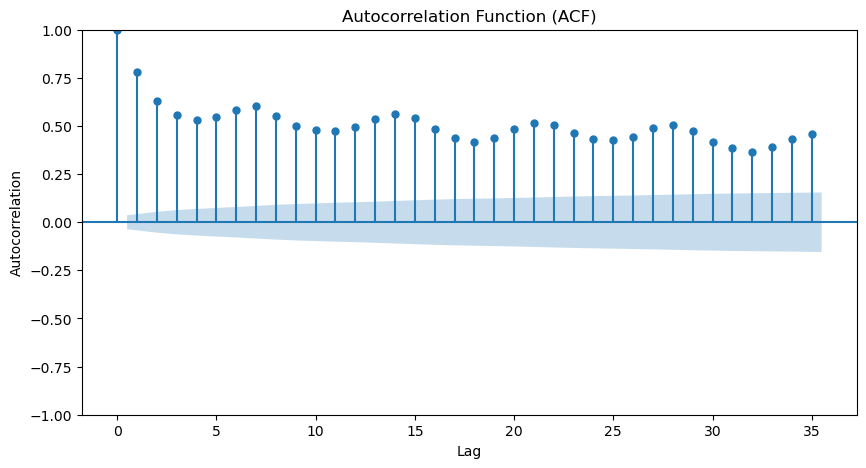

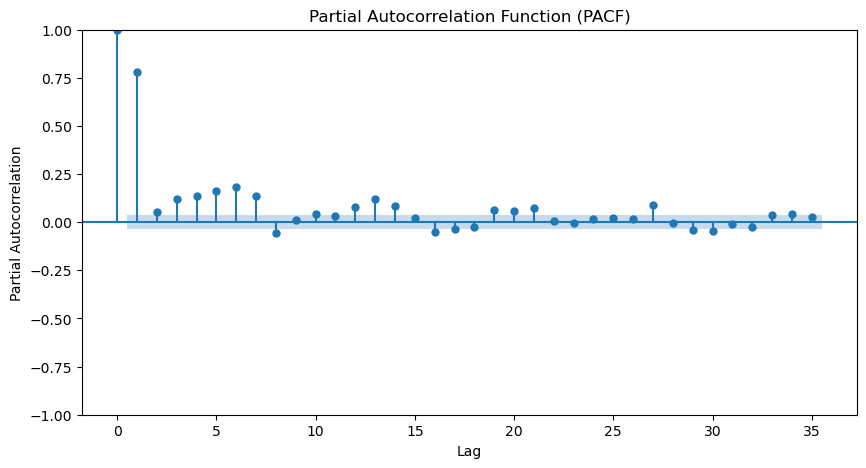

In [463]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_m_e_model, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df_m_e_model, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

             Total
Date              
2022-01-01  2186.0
2022-01-02  2701.0
2022-01-03  2547.0
2022-01-04  2157.0
2022-01-05  1948.0


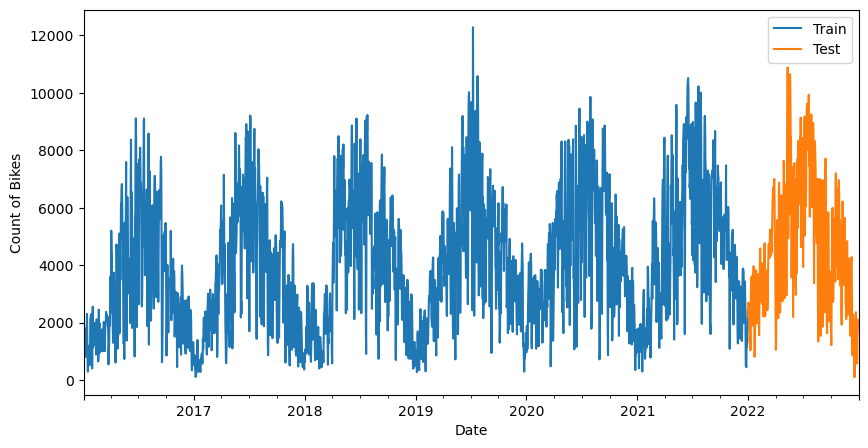

In [464]:
# Split into training and testing
df_train = df_m_e_model.iloc[:len(df_m_e_model) - 365]
df_test = df_m_e_model.iloc[len(df_m_e_model) - 365:]

print(df_test.head())

# Plot the last 6 years of training data and the testing data
ax = df_train[-6*365:].plot(figsize=(10, 5))
df_test.plot(ax=ax)
plt.legend(['Train', 'Test'])
plt.xlabel('Date')
plt.ylabel('Count of Bikes')
plt.show()


In [477]:
df_m_e_model.info()
time_series = df_m_e_model['Total']

# Now time_series is a pandas Series containing the time series data

# Import ARIMA model from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Define the order for ARIMA model (p, d, q)
order = (13, 1, 1) 

# Instantiate ARIMA model
arima_model = ARIMA(time_series, order=order)

# Fit ARIMA model
arima_fit = arima_model.fit()

predictions = arima_fit.predict()

# Print summary of the model
print(arima_fit.summary())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2922 entries, 2015-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   2922 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


/Users/caropaez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/caropaez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/caropaez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                 2922
Model:                ARIMA(13, 1, 1)   Log Likelihood              -25138.169
Date:                Thu, 14 Mar 2024   AIC                          50306.337
Time:                        08:32:32   BIC                          50396.033
Sample:                    01-01-2015   HQIC                         50338.644
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2109      0.159     -1.329      0.184      -0.522       0.100
ar.L2         -0.3443      0.058     -5.886      0.000      -0.459      -0.230
ar.L3         -0.3229      0.063     -5.104      0.0

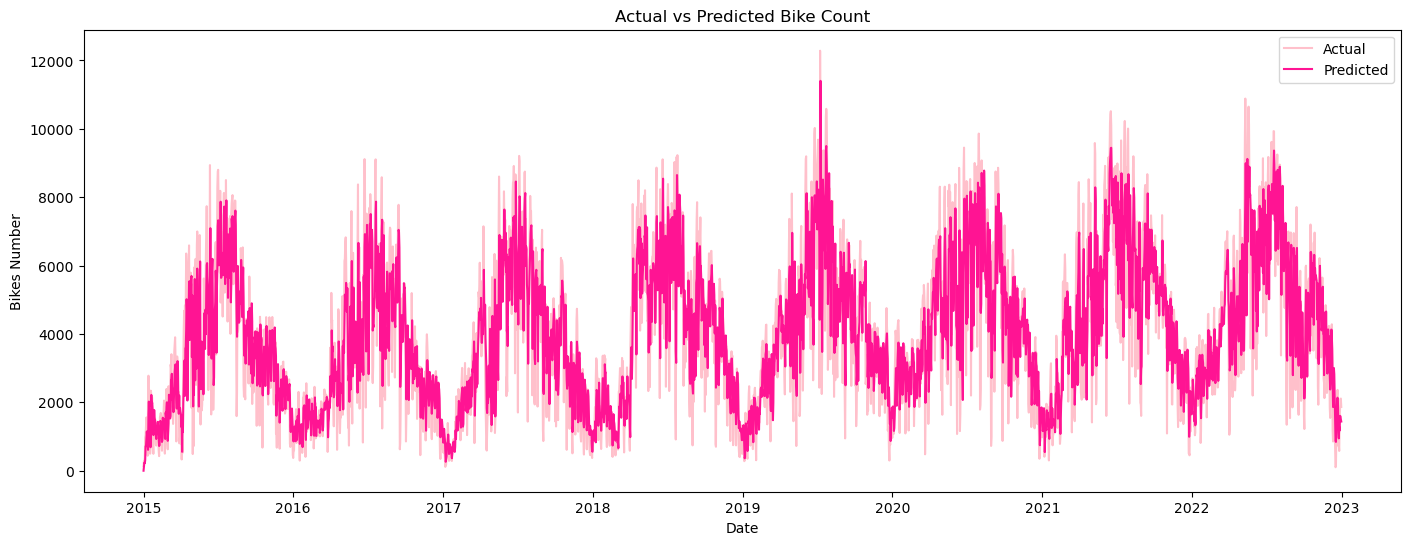

In [483]:
# Plot actual values and predictions
plt.figure(figsize=(17, 6))
plt.plot(time_series, label='Actual', color='pink')
plt.plot(predictions, color='deeppink', label='Predicted')
plt.title('Actual vs Predicted Bike Count')
plt.xlabel('Date')
plt.ylabel('Bikes Number')
plt.legend()
plt.show()

## Kreuther Location

In [465]:
# Calculate average temperature
df_location_kreuther['avg.temp'] = (df_location_kreuther['min.temp'] + df_location_kreuther['max.temp']) / 2

# Filter the DataFrame to include only rows with dates from 01.01.2015 until 31.03.2020
df_location_kreuther_before = df_location_kreuther[df_location_kreuther['datum'] <= '2020-03-31']

# Filter the DataFrame to include only rows with dates from 31.03.2020 until the latest one
df_location_kreuther_after = df_location_kreuther[df_location_kreuther['datum'] > '2020-03-31']

correlation_coef_k = df_location_kreuther['gesamt'].corr(df_location_kreuther['avg.temp'])
print("The overall correlation coefficient is: ", correlation_coef_k)

corr_coef_k_before = df_location_kreuther_before['gesamt'].corr(df_location_kreuther_before['avg.temp'])
corr_coef_k_after = df_location_kreuther_after['gesamt'].corr(df_location_kreuther_after['avg.temp'])
print("The correlation coefficient for before April 2020 is: ", corr_coef_k_before, ", and for after 2020: ", corr_coef_k_after, " with an average of: ", (corr_coef_k_after+corr_coef_k_before)/2)


KeyError: 'min.temp'

In [ ]:
# df_location_Hirsch.info()
#df_location_Olympia ## failure of the counting station in the Olympiapark from 15. June 2022 to the 31. August 2022
# df_location_Margareten.info()
# df_location_Arnulf.info() # For 2021, only data from 01.11.2021 and for 2019 from 01.06.2019 until 30.06.2019

In [ ]:

corr_coef_k_before = df_location_kreuther_before['gesamt'].corr(df_location_kreuther_before['niederschlag'])
corr_coef_k_after = df_location_kreuther_after['gesamt'].corr(df_location_kreuther_after['niederschlag'])
print("The correlation coefficient for the RAIN-BIKES relation before April 2020 is: ", corr_coef_k_before, ", and for after 2020: ", corr_coef_k_after, " with an average of: ", (corr_coef_k_after+corr_coef_k_before)/2)


The correlation coefficient for the RAIN-BIKES relation before April 2020 is:  -0.18942961948322726 , and for after 2020:  -0.13229384160288846  with an average of:  -0.16086173054305786


In [ ]:
df_location_erhardt = df_location_erhardt.rename(columns={'datum': 'Date', 'zaehlstelle': 'Location', 'gesamt':'Total', 'niederschlag':'Rainfall'})
df_location_erhardt.set_index('Date', inplace=True)

           Location  Total  min.temp  max.temp  Rainfall  avg.temp
Date                                                              
2015-01-01  Erhardt  137.0     -10.0       1.0       0.0      -4.0
2015-01-02  Erhardt  281.0     -12.0       4.0       6.0      -4.0
2015-01-03  Erhardt  269.0       0.0       4.0      26.0       2.0
2015-01-04  Erhardt  375.0       1.0       2.0       0.0       2.0
2015-01-05  Erhardt  976.0      -2.0       4.0       0.0       1.0


/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

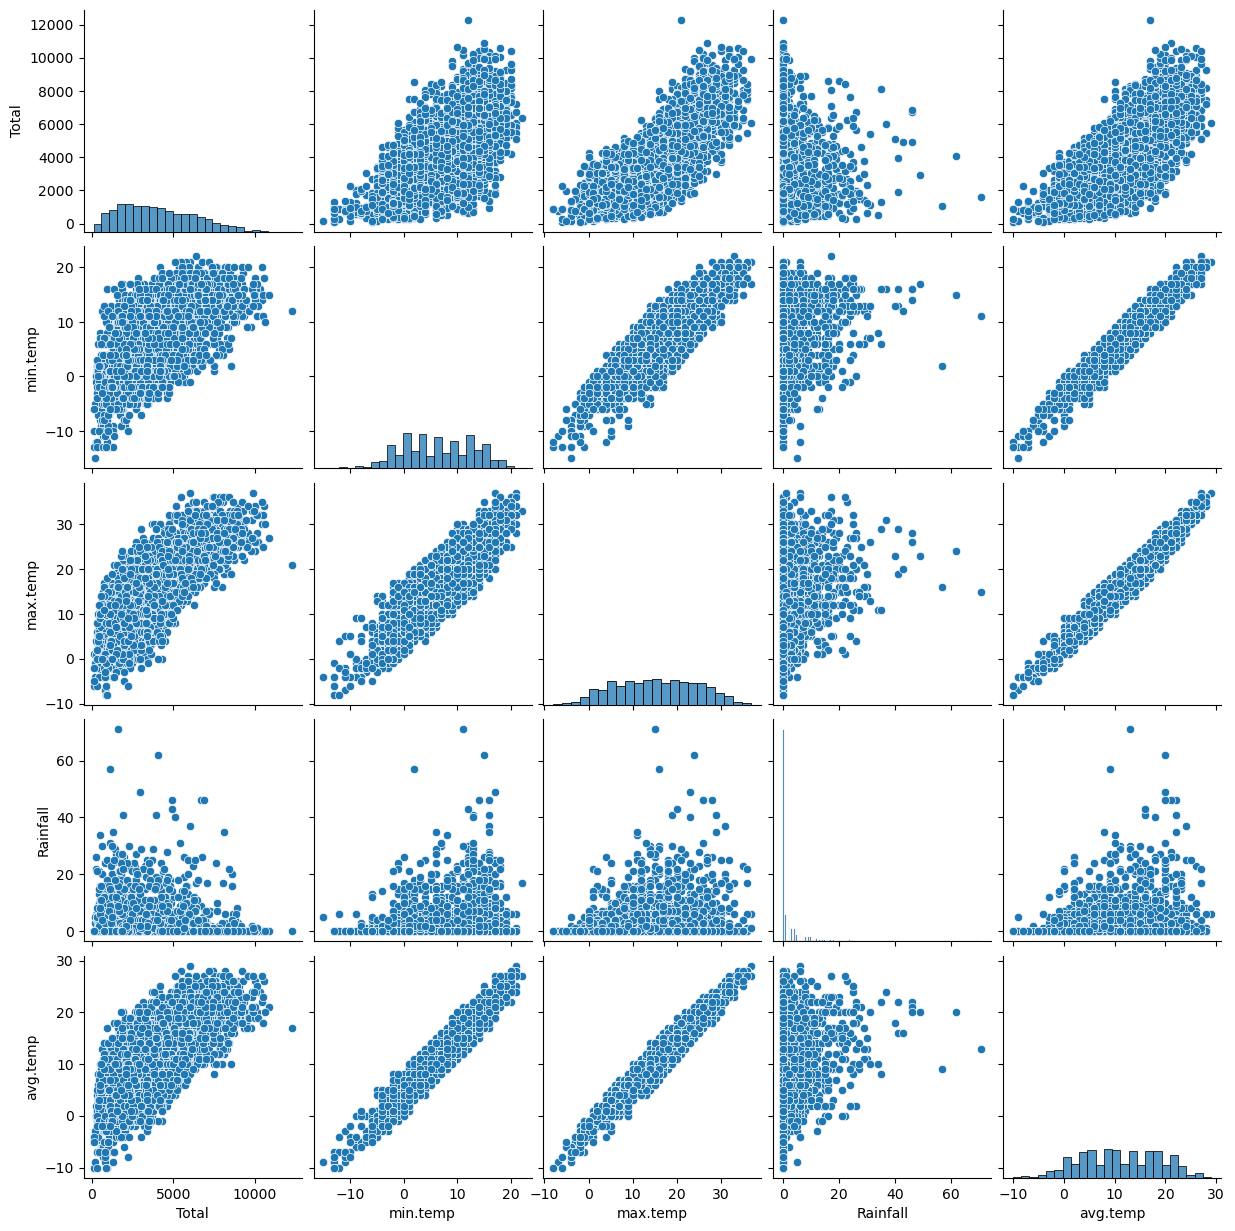

In [ ]:
print(df_location_erhardt.head())
sns.pairplot(df_location_erhardt)

### Checking if it is stationary or not for the Erhardt Location

In [ ]:
# Perform Augmented Dickey-Fuller test
# The ADF test is a statistical test commonly used to test for stationarity. 
# It tests the null hypothesis that a unit root is present in a time series sample. 
# If the p-value obtained from the test is less than a chosen significance level (e.g., 0.05), 
# you reject the null hypothesis, indicating that the data is stationary.
result = adfuller(df_location_erhardt['Total'])

# Print test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Print critical values
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

# Interpret results
if result[1] < 0.05:
    print('Reject the null hypothesis (non-stationary)')
else:
    print('Fail to reject the null hypothesis (stationary)')


ADF Statistic: -3.6698347228381016
p-value: 0.004558027689867485
Critical Values:
1%: -3.432612396049843
5%: -2.8625395742539688
10%: -2.5673021019579663
Reject the null hypothesis (non-stationary)
